# Compare outcomes from differential analysis based on different imputation methods

- load scores based on `10_1_ald_diff_analysis`

In [1]:
import logging
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from IPython.display import display

import vaep
import vaep.databases.diseases

logger = vaep.logging.setup_nb_logger()

plt.rcParams['figure.figsize'] = (2, 2)
fontsize = 5
vaep.plotting.make_large_descriptors(fontsize)
logging.getLogger('fontTools').setLevel(logging.ERROR)

# catch passed parameters
args = None
args = dict(globals()).keys()

## Parameters
Default and set parameters for the notebook.

In [2]:
folder_experiment = 'runs/appl_ald_data/plasma/proteinGroups'

target = 'kleiner'
model_key = 'VAE'
baseline = 'RSN'
out_folder = 'diff_analysis'
selected_statistics = ['p-unc', '-Log10 pvalue', 'qvalue', 'rejected']

disease_ontology = 5082  # code from https://disease-ontology.org/
# split diseases notebook? Query gene names for proteins in file from uniprot?
annotaitons_gene_col = 'PG.Genes'

In [3]:
# Parameters
disease_ontology = 10652
folder_experiment = "runs/alzheimer_study"
target = "AD"
baseline = "PI"
model_key = "CF"
out_folder = "diff_analysis"
annotaitons_gene_col = "None"


Add set parameters to configuration

In [4]:
params = vaep.nb.get_params(args, globals=globals())
args = vaep.nb.Config()
args.folder_experiment = Path(params["folder_experiment"])
args = vaep.nb.add_default_paths(args,
                                 out_root=(
                                     args.folder_experiment
                                     / params["out_folder"]
                                     / params["target"]
                                     / f"{params['baseline']}_vs_{params['model_key']}"))
args.update_from_dict(params)
args.scores_folder = scores_folder = (args.folder_experiment
                                      / params["out_folder"]
                                      / params["target"]
                                      / 'scores')
args.freq_features_observed = args.folder_experiment / 'freq_features_observed.csv'
args

root - INFO     Removed from global namespace: folder_experiment


root - INFO     Removed from global namespace: target


root - INFO     Removed from global namespace: model_key


root - INFO     Removed from global namespace: baseline


root - INFO     Removed from global namespace: out_folder


root - INFO     Removed from global namespace: selected_statistics


root - INFO     Removed from global namespace: disease_ontology


root - INFO     Removed from global namespace: annotaitons_gene_col


root - INFO     Already set attribute: folder_experiment has value runs/alzheimer_study


root - INFO     Already set attribute: out_folder has value diff_analysis


{'annotaitons_gene_col': 'None',
 'baseline': 'PI',
 'data': PosixPath('runs/alzheimer_study/data'),
 'disease_ontology': 10652,
 'folder_experiment': PosixPath('runs/alzheimer_study'),
 'freq_features_observed': PosixPath('runs/alzheimer_study/freq_features_observed.csv'),
 'model_key': 'CF',
 'out_figures': PosixPath('runs/alzheimer_study/figures'),
 'out_folder': PosixPath('runs/alzheimer_study/diff_analysis/AD/PI_vs_CF'),
 'out_metrics': PosixPath('runs/alzheimer_study'),
 'out_models': PosixPath('runs/alzheimer_study'),
 'out_preds': PosixPath('runs/alzheimer_study/preds'),
 'scores_folder': PosixPath('runs/alzheimer_study/diff_analysis/AD/scores'),
 'selected_statistics': ['p-unc', '-Log10 pvalue', 'qvalue', 'rejected'],
 'target': 'AD'}

### Excel file for exports

In [5]:
files_out = dict()
writer_args = dict(float_format='%.3f')

fname = args.out_folder / 'diff_analysis_compare_methods.xlsx'
files_out[fname.name] = fname
writer = pd.ExcelWriter(fname)
logger.info("Writing to excel file: %s", fname)

root - INFO     Writing to excel file: runs/alzheimer_study/diff_analysis/AD/PI_vs_CF/diff_analysis_compare_methods.xlsx


## Load scores

### Load baseline model scores
Show all statistics, later use selected statistics

In [6]:
fname = args.scores_folder / f'diff_analysis_scores_{args.baseline}.pkl'
scores_baseline = pd.read_pickle(fname)
scores_baseline

model                                      PI                        \
var                                        SS DF      F p-unc   np2   
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD         0.300  1  0.607 0.437 0.003   
                             age        0.091  1  0.184 0.669 0.001   
                             Kiel       1.750  1  3.543 0.061 0.018   
                             Magdeburg  4.233  1  8.569 0.004 0.043   
                             Sweden     6.877  1 13.922 0.000 0.068   
...                                       ... ..    ...   ...   ...   
S4R3U6                       AD         0.109  1  0.111 0.740 0.001   
                             age        1.577  1  1.607 0.206 0.008   
                             Kiel       0.213  1  0.216 0.642 0.001   
                             Magdeburg  3.418  1  3.482 0.064 0.018   
                             Sweden    11.795  1 12.016 0.001 0.059   

model                                                                 
var                                    -Log10 pvalue qvalue rejected  
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD                0.360  0.596    False  
                             age               0.175  0.788    False  
                             Kiel              1.212  0.144    False  
                             Magdeburg         2.416  0.015     True  
                             Sweden            3.600  0.002     True  
...                                              ...    ...      ...  
S4R3U6                       AD                0.131  0.841    False  
                             age               0.685  0.358    False  
                             Kiel              0.192  0.768    False  
                             Magdeburg         1.197  0.148    False  
                             Sweden            3.186  0.003     True  

[7105 rows x 8 columns]

### Load selected comparison model scores

In [7]:
fname = args.scores_folder / f'diff_analysis_scores_{args.model_key}.pkl'
scores_model = pd.read_pickle(fname)
scores_model

model                                      CF                        \
var                                        SS DF      F p-unc   np2   
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD         1.158  1  8.626 0.004 0.043   
                             age        0.013  1  0.098 0.754 0.001   
                             Kiel       0.235  1  1.753 0.187 0.009   
                             Magdeburg  0.295  1  2.196 0.140 0.011   
                             Sweden     1.382  1 10.291 0.002 0.051   
...                                       ... ..    ...   ...   ...   
S4R3U6                       AD         0.934  1  1.883 0.172 0.010   
                             age        0.830  1  1.672 0.198 0.009   
                             Kiel       2.029  1  4.089 0.045 0.021   
                             Magdeburg  1.013  1  2.042 0.155 0.011   
                             Sweden    18.676  1 37.638 0.000 0.165   

model                                                                 
var                                    -Log10 pvalue qvalue rejected  
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD                2.429  0.012     True  
                             age               0.123  0.833    False  
                             Kiel              0.728  0.302    False  
                             Magdeburg         0.854  0.239    False  
                             Sweden            2.805  0.006     True  
...                                              ...    ...      ...  
S4R3U6                       AD                0.766  0.283    False  
                             age               0.704  0.316    False  
                             Kiel              1.351  0.095    False  
                             Magdeburg         0.811  0.260    False  
                             Sweden            8.318  0.000     True  

[7105 rows x 8 columns]

### Combined scores
show only selected statistics for comparsion

In [8]:
scores = scores_model.join(scores_baseline, how='outer')[[args.baseline, args.model_key]]
scores = scores.loc[:, pd.IndexSlice[scores.columns.levels[0].to_list(),
                                     args.selected_statistics]]
scores

model                                     CF                                \
var                                    p-unc -Log10 pvalue qvalue rejected   
protein groups               Source                                          
A0A024QZX5;A0A087X1N8;P35237 AD        0.004         2.429  0.012     True   
                             age       0.754         0.123  0.833    False   
                             Kiel      0.187         0.728  0.302    False   
                             Magdeburg 0.140         0.854  0.239    False   
                             Sweden    0.002         2.805  0.006     True   
...                                      ...           ...    ...      ...   
S4R3U6                       AD        0.172         0.766  0.283    False   
                             age       0.198         0.704  0.316    False   
                             Kiel      0.045         1.351  0.095    False   
                             Magdeburg 0.155         0.811  0.260    False   
                             Sweden    0.000         8.318  0.000     True   

model                                     PI                                
var                                    p-unc -Log10 pvalue qvalue rejected  
protein groups               Source                                         
A0A024QZX5;A0A087X1N8;P35237 AD        0.437         0.360  0.596    False  
                             age       0.669         0.175  0.788    False  
                             Kiel      0.061         1.212  0.144    False  
                             Magdeburg 0.004         2.416  0.015     True  
                             Sweden    0.000         3.600  0.002     True  
...                                      ...           ...    ...      ...  
S4R3U6                       AD        0.740         0.131  0.841    False  
                             age       0.206         0.685  0.358    False  
                             Kiel      0.642         0.192  0.768    False  
                             Magdeburg 0.064         1.197  0.148    False  
                             Sweden    0.001         3.186  0.003     True  

[7105 rows x 8 columns]

Models in comparison (name mapping)

In [9]:
models = vaep.nb.Config.from_dict(
    vaep.pandas.index_to_dict(scores.columns.get_level_values(0)))
vars(models)

{'CF': 'CF', 'PI': 'PI'}

## Describe scores

In [10]:
scores.describe()

model        CF                                PI                        
var       p-unc -Log10 pvalue    qvalue     p-unc -Log10 pvalue    qvalue
count 7,105.000     7,105.000 7,105.000 7,105.000     7,105.000 7,105.000
mean      0.228         3.226     0.283     0.263         2.482     0.341
std       0.294         6.117     0.321     0.305         5.330     0.333
min       0.000         0.001     0.000     0.000         0.000     0.000
25%       0.001         0.398     0.003     0.004         0.334     0.014
50%       0.066         1.181     0.132     0.121         0.916     0.243
75%       0.400         3.197     0.533     0.464         2.454     0.618
max       0.998        86.330     0.998     1.000       147.230     1.000

### One to one comparison of by feature:

In [11]:
scores = scores.loc[pd.IndexSlice[:, args.target], :]
scores.to_excel(writer, 'scores', **writer_args)
scores

model                                                        CF                \
var                                                       p-unc -Log10 pvalue   
protein groups                                     Source                       
A0A024QZX5;A0A087X1N8;P35237                       AD     0.004         2.429   
A0A024R0T9;K7ER74;P02655                           AD     0.028         1.546   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD     0.342         0.466   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD     0.245         0.611   
A0A075B6H7                                         AD     0.000         3.417   
...                                                         ...           ...   
Q9Y6R7                                             AD     0.175         0.756   
Q9Y6X5                                             AD     0.175         0.758   
Q9Y6Y8;Q9Y6Y8-2                                    AD     0.083         1.079   
Q9Y6Y9                                             AD     0.627         0.203   
S4R3U6                                             AD     0.172         0.766   

model                                                                      \
var                                                       qvalue rejected   
protein groups                                     Source                   
A0A024QZX5;A0A087X1N8;P35237                       AD      0.012     True   
A0A024R0T9;K7ER74;P02655                           AD      0.066    False   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD      0.477    False   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD      0.372    False   
A0A075B6H7                                         AD      0.002     True   
...                                                          ...      ...   
Q9Y6R7                                             AD      0.287    False   
Q9Y6X5                                             AD      0.287    False   
Q9Y6Y8;Q9Y6Y8-2                                    AD      0.158    False   
Q9Y6Y9                                             AD      0.735    False   
S4R3U6                                             AD      0.283    False   

model                                                        PI                \
var                                                       p-unc -Log10 pvalue   
protein groups                                     Source                       
A0A024QZX5;A0A087X1N8;P35237                       AD     0.437         0.360   
A0A024R0T9;K7ER74;P02655                           AD     0.040         1.394   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD     0.104         0.985   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD     0.433         0.364   
A0A075B6H7                                         AD     0.162         0.791   
...                                                         ...           ...   
Q9Y6R7                                             AD     0.175         0.756   
Q9Y6X5                                             AD     0.024         1.617   
Q9Y6Y8;Q9Y6Y8-2                                    AD     0.083         1.079   
Q9Y6Y9                                             AD     0.786         0.105   
S4R3U6                                             AD     0.740         0.131   

model                                                                      
var                                                       qvalue rejected  
protein groups                                     Source                  
A0A024QZX5;A0A087X1N8;P35237                       AD      0.596    False  
A0A024R0T9;K7ER74;P02655                           AD      0.103    False  
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD      0.216    False  
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD      0.592    False  
A0A075B6H7                                         AD      0.301    False  
...                                        

And the descriptive statistics
of the numeric values:

In [12]:
scores.describe()

model        CF                                PI                        
var       p-unc -Log10 pvalue    qvalue     p-unc -Log10 pvalue    qvalue
count 1,421.000     1,421.000 1,421.000 1,421.000     1,421.000 1,421.000
mean      0.240         1.577     0.302     0.259         1.391     0.342
std       0.291         1.853     0.315     0.298         1.601     0.322
min       0.000         0.002     0.000     0.000         0.000     0.000
25%       0.007         0.374     0.021     0.012         0.360     0.040
50%       0.085         1.070     0.161     0.131         0.883     0.257
75%       0.422         2.128     0.556     0.437         1.904     0.596
max       0.996        22.824     0.997     1.000        19.401     1.000

and the boolean decision values

In [13]:
scores.describe(include=['bool', 'O'])

model,CF,PI
var,rejected,rejected
count,1421,1421
unique,2,2
top,False,False
freq,957,1039


## Load frequencies of observed features

In [14]:
freq_feat = pd.read_csv(args.freq_features_observed, index_col=0)
freq_feat.columns = pd.MultiIndex.from_tuples([('data', 'frequency'),])
freq_feat

,data
,frequency
protein groups,
A0A024QZX5;A0A087X1N8;P35237,186
A0A024R0T9;K7ER74;P02655,195
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;O60462-4;O60462-5;Q7LBX6;X5D2Q8,174
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503,196
A0A075B6H7,91
...,...
Q9Y6R7,197
Q9Y6X5,173


## Compare shared features

In [15]:
scores_common = (scores
                 .dropna()
                 .reset_index(-1, drop=True)
                 ).join(
    freq_feat, how='left'
)
scores_common

CF                       \
                                                   p-unc -Log10 pvalue qvalue   
protein groups                                                                  
A0A024QZX5;A0A087X1N8;P35237                       0.004         2.429  0.012   
A0A024R0T9;K7ER74;P02655                           0.028         1.546  0.066   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... 0.342         0.466  0.477   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            0.245         0.611  0.372   
A0A075B6H7                                         0.000         3.417  0.002   
...                                                  ...           ...    ...   
Q9Y6R7                                             0.175         0.756  0.287   
Q9Y6X5                                             0.175         0.758  0.287   
Q9Y6Y8;Q9Y6Y8-2                                    0.083         1.079  0.158   
Q9Y6Y9                                             0.627         0.203  0.735   
S4R3U6                                             0.172         0.766  0.283   

                                                               PI  \
                                                   rejected p-unc   
protein groups                                                      
A0A024QZX5;A0A087X1N8;P35237                           True 0.437   
A0A024R0T9;K7ER74;P02655                              False 0.040   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;...    False 0.104   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503               False 0.433   
A0A075B6H7                                             True 0.162   
...                                                     ...   ...   
Q9Y6R7                                                False 0.175   
Q9Y6X5                                                False 0.024   
Q9Y6Y8;Q9Y6Y8-2                                       False 0.083   
Q9Y6Y9                                                False 0.786   
S4R3U6                                                False 0.740   

                                                                         \
                                                   -Log10 pvalue qvalue   
protein groups                                                            
A0A024QZX5;A0A087X1N8;P35237                               0.360  0.596   
A0A024R0T9;K7ER74;P02655                                   1.394  0.103   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;...         0.985  0.216   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503                    0.364  0.592   
A0A075B6H7                                                 0.791  0.301   
...                                                          ...    ...   
Q9Y6R7                                                     0.756  0.319   
Q9Y6X5                                                     1.617  0.069   
Q9Y6Y8;Q9Y6Y8-2                                            1.079  0.183   
Q9Y6Y9                                                     0.105  0.874   
S4R3U6                                                     0.131  0.841   

                                                                 data  
                                                   rejected frequency  
protein groups                                                         
A0A024QZX5;A0A087X1N8;P35237                          False       186  
A0A024R0T9;K7ER74;P02655                              False       195  
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;...    False       174  
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503               False       196  
A0A075B6H7                                            False        91  
...                                                     ...       ...  
Q9Y6R7                                                False       197  
Q9Y6X5                                                False       173  
Q9Y6Y8;Q9Y6Y8-2                                       False       197  
Q9Y6Y9                               

### Annotate decisions in Confusion Table style:

In [16]:
def annotate_decision(scores, model, model_column):
    return scores[(model_column, 'rejected')].replace({False: f'{model} (no) ', True: f'{model} (yes)'})


annotations = None
for model, model_column in models.items():
    if annotations is not None:
        annotations += ' - '
        annotations += annotate_decision(scores_common,
                                         model=model, model_column=model_column)
    else:
        annotations = annotate_decision(
            scores_common, model=model, model_column=model_column)
annotations.name = 'Differential Analysis Comparison'
annotations.value_counts()

Differential Analysis Comparison
CF (no)  - PI (no)    904
CF (yes) - PI (yes)   329
CF (yes) - PI (no)    135
CF (no)  - PI (yes)    53
Name: count, dtype: int64

### List different decisions between models

In [17]:
mask_different = (
    (scores_common.loc[:, pd.IndexSlice[:, 'rejected']].any(axis=1))
    & ~(scores_common.loc[:, pd.IndexSlice[:, 'rejected']].all(axis=1))
)
_to_write = scores_common.loc[mask_different]
_to_write.to_excel(writer, 'differences', **writer_args)
logger.info("Writen to Excel file under sheet 'differences'.")
_to_write

root - INFO     Writen to Excel file under sheet 'differences'.


CF                                  PI  \
                             p-unc -Log10 pvalue qvalue rejected p-unc   
protein groups                                                           
A0A024QZX5;A0A087X1N8;P35237 0.004         2.429  0.012     True 0.437   
A0A075B6H7                   0.000         3.417  0.002     True 0.162   
A0A075B6I0                   0.001         3.071  0.003     True 0.017   
A0A075B6R2                   0.001         2.973  0.004     True 0.430   
A0A075B6S5                   0.019         1.720  0.047     True 0.399   
...                            ...           ...    ...      ...   ...   
Q9UJ14                       0.018         1.740  0.045     True 0.024   
Q9UKB5                       0.260         0.584  0.389    False 0.014   
Q9ULZ9                       0.021         1.674  0.051    False 0.000   
Q9UP79                       0.000         4.222  0.000     True 0.217   
Q9UQ52                       0.000         3.413  0.002     True 0.050   

                                                                data  
                             -Log10 pvalue qvalue rejected frequency  
protein groups                                                        
A0A024QZX5;A0A087X1N8;P35237         0.360  0.596    False       186  
A0A075B6H7                           0.791  0.301    False        91  
A0A075B6I0                           1.772  0.052    False       194  
A0A075B6R2                           0.366  0.590    False       164  
A0A075B6S5                           0.399  0.561    False       129  
...                                    ...    ...      ...       ...  
Q9UJ14                               1.623  0.068    False       169  
Q9UKB5                               1.839  0.046     True       148  
Q9ULZ9                               3.651  0.001     True       171  
Q9UP79                               0.664  0.370    False       135  
Q9UQ52                               1.299  0.123    False       188  

[188 rows x 9 columns]

## Plot qvalues of both models with annotated decisions

Prepare data for plotting (qvalues)

In [18]:
var = 'qvalue'
to_plot = [scores_common[v][var] for v in models.values()]
for s, k in zip(to_plot, models.keys()):
    s.name = k.replace('_', ' ')
to_plot.append(scores_common['data'])
to_plot.append(annotations)
to_plot = pd.concat(to_plot, axis=1)
to_plot

,CF,PI,frequency,Differential Analysis Comparison
protein groups,,,,
A0A024QZX5;A0A087X1N8;P35237,0.012,0.596,186,CF (yes) - PI (no)
A0A024R0T9;K7ER74;P02655,0.066,0.103,195,CF (no) - PI (no)
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;O60462-4;O60462-5;Q7LBX6;X5D2Q8,0.477,0.216,174,CF (no) - PI (no)
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503,0.372,0.592,196,CF (no) - PI (no)
A0A075B6H7,0.002,0.301,91,CF (yes) - PI (no)
...,...,...,...,...
Q9Y6R7,0.287,0.319,197,CF (no) - PI (no)
Q9Y6X5,0.287,0.069,173,CF (no) - PI (no)
Q9Y6Y8;Q9Y6Y8-2,0.158,0.183,197,CF (no) - PI (no)


List of features with the highest difference in qvalues

In [19]:
# should it be possible to run not only RSN?
to_plot['diff_qvalue'] = (to_plot[str(args.baseline)] - to_plot[str(args.model_key)]).abs()
to_plot.loc[mask_different].sort_values('diff_qvalue', ascending=False)

,CF,PI,frequency,Differential Analysis Comparison,diff_qvalue
protein groups,,,,,
P48745,0.007,0.978,180,CF (yes) - PI (no),0.971
P22692;P22692-2,0.027,0.996,170,CF (yes) - PI (no),0.969
O95497,0.000,0.961,89,CF (yes) - PI (no),0.961
O94898,0.025,0.985,60,CF (yes) - PI (no),0.960
Q9NPH3;Q9NPH3-2;Q9NPH3-5,0.034,0.976,186,CF (yes) - PI (no),0.942
...,...,...,...,...,...
Q9NX62,0.046,0.056,197,CF (yes) - PI (no),0.010
P00740;P00740-2,0.044,0.053,197,CF (yes) - PI (no),0.009
K7ERG9;P00746,0.043,0.052,197,CF (yes) - PI (no),0.009


### Differences plotted with created annotations

vaep.plotting - INFO     Saved Figures to runs/alzheimer_study/diff_analysis/AD/PI_vs_CF/diff_analysis_comparision_1_CF


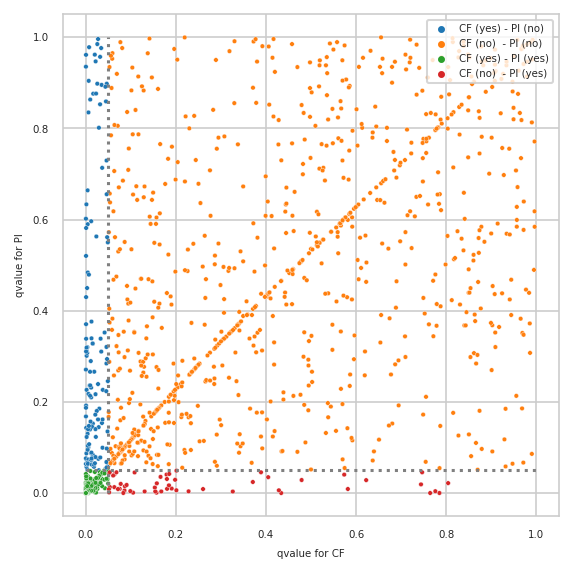

In [20]:
figsize = (4, 4)
size = 5
fig, ax = plt.subplots(figsize=figsize)
x_col = to_plot.columns[0]
y_col = to_plot.columns[1]
ax = sns.scatterplot(data=to_plot,
                     x=x_col,
                     y=y_col,
                     s=size,
                     hue='Differential Analysis Comparison',
                     ax=ax)
_ = ax.legend(fontsize=fontsize,
              title_fontsize=fontsize,
              markerscale=0.4,
              title='',
              )
ax.set_xlabel(f"qvalue for {x_col}")
ax.set_ylabel(f"qvalue for {y_col}")
ax.hlines(0.05, 0, 1, color='grey', linestyles='dotted')
ax.vlines(0.05, 0, 1, color='grey', linestyles='dotted')
sns.move_legend(ax, "upper right")
files_out[f'diff_analysis_comparision_1_{args.model_key}'] = (
    args.out_folder /
    f'diff_analysis_comparision_1_{args.model_key}')
fname = files_out[f'diff_analysis_comparision_1_{args.model_key}']
vaep.savefig(fig, name=fname)

- also showing how many features were measured ("observed") by size of circle

vaep.plotting - INFO     Saved Figures to runs/alzheimer_study/diff_analysis/AD/PI_vs_CF/diff_analysis_comparision_2_CF


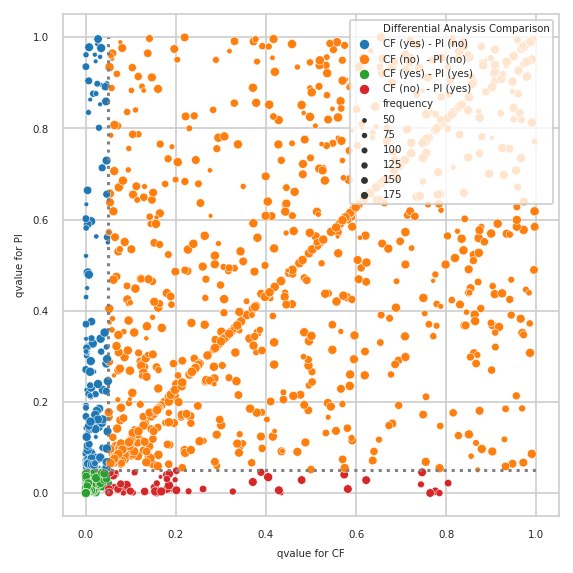

In [21]:
fig, ax = plt.subplots(figsize=figsize)
ax = sns.scatterplot(data=to_plot,
                     x=to_plot.columns[0],
                     y=to_plot.columns[1],
                     size='frequency',
                     s=size,
                     sizes=(5, 20),
                     hue='Differential Analysis Comparison')
_ = ax.legend(fontsize=fontsize,
              title_fontsize=fontsize,
              markerscale=0.6,
              title='',
              )
ax.set_xlabel(f"qvalue for {x_col}")
ax.set_ylabel(f"qvalue for {y_col}")
ax.hlines(0.05, 0, 1, color='grey', linestyles='dotted')
ax.vlines(0.05, 0, 1, color='grey', linestyles='dotted')
sns.move_legend(ax, "upper right")
files_out[f'diff_analysis_comparision_2_{args.model_key}'] = (
    args.out_folder / f'diff_analysis_comparision_2_{args.model_key}')
vaep.savefig(
    fig, name=files_out[f'diff_analysis_comparision_2_{args.model_key}'])

## Only features contained in model
- this block exist due to a specific part in the ALD analysis of the paper

In [22]:
scores_model_only = scores.reset_index(level=-1, drop=True)
_diff = scores_model_only.index.difference(scores_common.index)
if not _diff.empty:
    scores_model_only = (scores_model_only
                         .loc[
                             _diff,
                             args.model_key]
                         .sort_values(by='qvalue', ascending=True)
                         .join(freq_feat.squeeze().rename(freq_feat.columns.droplevel()[0])
                               )
                         )
    display(scores_model_only)
else:
    scores_model_only = None
    logger.info("No features only in new comparision model.")

if not _diff.empty:
    scores_model_only.to_excel(writer, 'only_model', **writer_args)
    display(scores_model_only.rejected.value_counts())
    scores_model_only_rejected = scores_model_only.loc[scores_model_only.rejected]
    scores_model_only_rejected.to_excel(
        writer, 'only_model_rejected', **writer_args)

root - INFO     No features only in new comparision model.


## DISEASES DB lookup

Query diseases database for gene associations with specified disease ontology id.

In [23]:
data = vaep.databases.diseases.get_disease_association(
    doid=args.disease_ontology, limit=10000)
data = pd.DataFrame.from_dict(data, orient='index').rename_axis('ENSP', axis=0)
data = data.rename(columns={'name': args.annotaitons_gene_col}).reset_index(
).set_index(args.annotaitons_gene_col)
data

vaep.databases.diseases - WARNING  There are more associations available


,ENSP,score
None,,
PSEN2,ENSP00000355747,5.000
PSEN1,ENSP00000326366,5.000
APOE,ENSP00000252486,5.000
APP,ENSP00000284981,5.000
MAPT,ENSP00000340820,4.800
...,...,...
ZBTB22,ENSP00000407545,0.683
HMGN2,ENSP00000355228,0.683
PPP1R13B,ENSP00000202556,0.683


## Shared features
ToDo: new script -> DISEASES DB lookup

In [24]:
feat_name = scores.index.names[0]  # first index level is feature name
if args.annotaitons_gene_col in scores.index.names:
    logger.info(f"Found gene annotation in scores index:  {scores.index.names}")
else:
    logger.info(f"No gene annotation in scores index:  {scores.index.names}"
                " Exiting.")
    import sys
    sys.exit(0)

root - INFO     No gene annotation in scores index:  ['protein groups', 'Source'] Exiting.


SystemExit: 0

In [ ]:
gene_to_PG = (scores.droplevel(
    list(set(scores.index.names) - {feat_name, args.annotaitons_gene_col})
)
    .index
    .to_frame()
    .reset_index(drop=True)
    .set_index(args.annotaitons_gene_col)
)
gene_to_PG.head()

In [ ]:
disease_associations_all = data.join(
    gene_to_PG).dropna().reset_index().set_index(feat_name).join(annotations)
disease_associations_all

## only by model

In [ ]:
idx = disease_associations_all.index.intersection(scores_model_only.index)
disease_assocications_new = disease_associations_all.loc[idx].sort_values(
    'score', ascending=False)
disease_assocications_new.head(20)

In [ ]:
mask = disease_assocications_new.loc[idx, 'score'] >= 2.0
disease_assocications_new.loc[idx].loc[mask]

## Only by model which were significant

In [ ]:
idx = disease_associations_all.index.intersection(
    scores_model_only_rejected.index)
disease_assocications_new_rejected = disease_associations_all.loc[idx].sort_values(
    'score', ascending=False)
disease_assocications_new_rejected.head(20)

In [ ]:
mask = disease_assocications_new_rejected.loc[idx, 'score'] >= 2.0
disease_assocications_new_rejected.loc[idx].loc[mask]

## Shared which are only significant for by model

In [ ]:
mask = (scores_common[(str(args.model_key), 'rejected')] & mask_different)
mask.sum()

In [ ]:
idx = disease_associations_all.index.intersection(mask.index[mask])
disease_assocications_shared_rejected_by_model = (disease_associations_all.loc[idx].sort_values(
    'score', ascending=False))
disease_assocications_shared_rejected_by_model.head(20)

In [ ]:
mask = disease_assocications_shared_rejected_by_model.loc[idx, 'score'] >= 2.0
disease_assocications_shared_rejected_by_model.loc[idx].loc[mask]

## Only significant by RSN

In [ ]:
mask = (scores_common[(str(args.baseline), 'rejected')] & mask_different)
mask.sum()

In [ ]:
idx = disease_associations_all.index.intersection(mask.index[mask])
disease_assocications_shared_rejected_by_RSN = (
    disease_associations_all
    .loc[idx]
    .sort_values('score', ascending=False))
disease_assocications_shared_rejected_by_RSN.head(20)

In [ ]:
mask = disease_assocications_shared_rejected_by_RSN.loc[idx, 'score'] >= 2.0
disease_assocications_shared_rejected_by_RSN.loc[idx].loc[mask]

## Write to excel

In [ ]:
disease_associations_all.to_excel(
    writer, sheet_name='disease_assoc_all', **writer_args)
disease_assocications_new.to_excel(
    writer, sheet_name='disease_assoc_new', **writer_args)
disease_assocications_new_rejected.to_excel(
    writer, sheet_name='disease_assoc_new_rejected', **writer_args)

## Outputs

In [ ]:
writer.close()
files_out